# Face detection application using neural network and Keras

- First we import our packages

In [1]:
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
import tensorflow as tf
from load import load
import numpy as np
%matplotlib inline


Using TensorFlow backend.


- Loading our dataset

In [2]:
x_train, y_train, x_test, y_test, classes = load()
print(classes)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

['ashraf', 'joseph', 'magdy', 'ref', 'sayed', 'Shehab']
(1320, 48, 48, 3)
(1320, 1)
(330, 48, 48, 3)
(330, 1)


- Making sure that photos have arrived safely

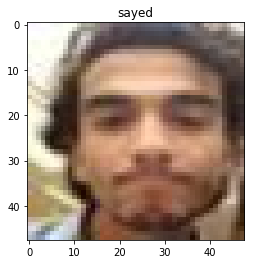

In [3]:
index = 55

plt.title(classes[y_train[index][0]])
plt.imshow((x_train[index]).astype(np.uint8))
plt.show()

- Normalizing data

In [4]:
x_train = x_train / 255
x_test = x_test / 255

- Applying one hot encoding <br>
In a brief one hot encoding is converting category which is a number in our case 
refers to the persons name to something like identity array.

In [5]:
y_train_hot = to_categorical(y_train, num_classes=6)
y_test_hot = to_categorical(y_test, num_classes=6)
print(y_train_hot.shape)
print(y_test_hot.shape)
print(y_train[0])
print(y_train_hot[0])

(1320, 6)
(330, 6)
[0]
[1. 0. 0. 0. 0. 0.]


- Building our model

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(padding='valid', input_shape=(48, 48, 3), kernel_size=3, filters=20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=5),
    # tf.keras.layers.Conv2D(padding='valid', kernel_size=3, filters=12, activation='relu'),
    # tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])


- Compiling our model

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


- Training our model on training data

In [8]:
model.fit(x_train, y_train_hot, epochs=10, batch_size=50)


Epoch 1/10


  50/1320 [>.............................] - ETA: 11s - loss: 2.1418 - acc: 0.1800

 100/1320 [=>............................] - ETA: 6s - loss: 2.6007 - acc: 0.2600 

 150/1320 [==>...........................] - ETA: 5s - loss: 2.5013 - acc: 0.2733

 200/1320 [===>..........................] - ETA: 4s - loss: 2.4438 - acc: 0.2600

 250/1320 [====>.........................] - ETA: 3s - loss: 2.3958 - acc: 0.2560

 300/1320 [=====>........................] - ETA: 3s - loss: 2.3363 - acc: 0.2500

 350/1320 [======>.......................] - ETA: 2s - loss: 2.2327 - acc: 0.2571

 400/1320 [========>.....................] - ETA: 2s - loss: 2.1306 - acc: 0.2900

 450/1320 [=========>....................] - ETA: 2s - loss: 2.0880 - acc: 0.3044

 500/1320 [==========>...................] - ETA: 2s - loss: 2.0288 - acc: 0.3100

 550/1320 [===========>..................] - ETA: 2s - loss: 2.0025 - acc: 0.3218

 600/1320 [============>.................] - ETA: 1s - loss: 1.9562 - acc: 0.3317

 650/1320 [=============>................] - ETA: 1s - loss: 1.9304 - acc: 0.3446

 700/1320 [==============>...............] - ETA: 1s - loss: 1.8819 - acc: 0.3514

 750/1320 [================>.............] - ETA: 1s - loss: 1.8594 - acc: 0.3613

 800/1320 [=================>............] - ETA: 1s - loss: 1.8362 - acc: 0.3675

 850/1320 [==================>...........] - ETA: 1s - loss: 1.8024 - acc: 0.3800

 900/1320 [===================>..........] - ETA: 1s - loss: 1.7742 - acc: 0.3911

 950/1320 [====================>.........] - ETA: 0s - loss: 1.7407 - acc: 0.4053

1000/1320 [=====================>........] - ETA: 0s - loss: 1.7204 - acc: 0.4110

1050/1320 [======================>.......] - ETA: 0s - loss: 1.6925 - acc: 0.4171

1100/1320 [========================>.....] - ETA: 0s - loss: 1.6635 - acc: 0.4245

1150/1320 [=========================>....] - ETA: 0s - loss: 1.6409 - acc: 0.4330

1200/1320 [==========================>...] - ETA: 0s - loss: 1.6077 - acc: 0.4417

1250/1320 [===========================>..] - ETA: 0s - loss: 1.5864 - acc: 0.4488

1300/1320 [============================>.] - ETA: 0s - loss: 1.5661 - acc: 0.4515

1320/1320 [==============================] - 3s 2ms/step - loss: 1.5592 - acc: 0.4538


Epoch 2/10


  50/1320 [>.............................] - ETA: 2s - loss: 0.7910 - acc: 0.7800

 100/1320 [=>............................] - ETA: 2s - loss: 0.7086 - acc: 0.7600

 150/1320 [==>...........................] - ETA: 2s - loss: 0.7832 - acc: 0.7467

 200/1320 [===>..........................] - ETA: 2s - loss: 0.7369 - acc: 0.7600

 250/1320 [====>.........................] - ETA: 2s - loss: 0.7197 - acc: 0.7560

 300/1320 [=====>........................] - ETA: 2s - loss: 0.6960 - acc: 0.7667

 350/1320 [======>.......................] - ETA: 1s - loss: 0.6602 - acc: 0.7829

 400/1320 [========>.....................] - ETA: 1s - loss: 0.6421 - acc: 0.7900

 450/1320 [=========>....................] - ETA: 1s - loss: 0.6303 - acc: 0.7956

 500/1320 [==========>...................] - ETA: 1s - loss: 0.6162 - acc: 0.8020

 550/1320 [===========>..................] - ETA: 1s - loss: 0.6111 - acc: 0.8073

 600/1320 [============>.................] - ETA: 1s - loss: 0.6051 - acc: 0.8117

 650/1320 [=============>................] - ETA: 1s - loss: 0.6055 - acc: 0.8108

 700/1320 [==============>...............] - ETA: 1s - loss: 0.6032 - acc: 0.8086

 750/1320 [================>.............] - ETA: 1s - loss: 0.6046 - acc: 0.8053

 800/1320 [=================>............] - ETA: 1s - loss: 0.6139 - acc: 0.8037

 850/1320 [==================>...........] - ETA: 0s - loss: 0.6419 - acc: 0.7929

 900/1320 [===================>..........] - ETA: 0s - loss: 0.6392 - acc: 0.7911

 950/1320 [====================>.........] - ETA: 0s - loss: 0.6312 - acc: 0.7947

1000/1320 [=====================>........] - ETA: 0s - loss: 0.6303 - acc: 0.7980

1050/1320 [======================>.......] - ETA: 0s - loss: 0.6236 - acc: 0.8000

1100/1320 [========================>.....] - ETA: 0s - loss: 0.6198 - acc: 0.8009

1150/1320 [=========================>....] - ETA: 0s - loss: 0.6200 - acc: 0.7983

1200/1320 [==========================>...] - ETA: 0s - loss: 0.6134 - acc: 0.8000

1250/1320 [===========================>..] - ETA: 0s - loss: 0.6080 - acc: 0.8016

1300/1320 [============================>.] - ETA: 0s - loss: 0.6007 - acc: 0.8023

1320/1320 [==============================] - 3s 2ms/step - loss: 0.6017 - acc: 0.8023


Epoch 3/10


  50/1320 [>.............................] - ETA: 2s - loss: 0.3976 - acc: 0.9000

 100/1320 [=>............................] - ETA: 2s - loss: 0.4255 - acc: 0.8500

 150/1320 [==>...........................] - ETA: 2s - loss: 0.4526 - acc: 0.8467

 200/1320 [===>..........................] - ETA: 2s - loss: 0.4467 - acc: 0.8450

 250/1320 [====>.........................] - ETA: 2s - loss: 0.4061 - acc: 0.8680

 300/1320 [=====>........................] - ETA: 2s - loss: 0.4059 - acc: 0.8700

 350/1320 [======>.......................] - ETA: 2s - loss: 0.4016 - acc: 0.8714

 400/1320 [========>.....................] - ETA: 1s - loss: 0.4059 - acc: 0.8650

 450/1320 [=========>....................] - ETA: 1s - loss: 0.4106 - acc: 0.8600

 500/1320 [==========>...................] - ETA: 1s - loss: 0.3971 - acc: 0.8660

 550/1320 [===========>..................] - ETA: 1s - loss: 0.3811 - acc: 0.8691

 600/1320 [============>.................] - ETA: 1s - loss: 0.3763 - acc: 0.8717

 650/1320 [=============>................] - ETA: 1s - loss: 0.3723 - acc: 0.8723

 700/1320 [==============>...............] - ETA: 1s - loss: 0.3731 - acc: 0.8757

 750/1320 [================>.............] - ETA: 1s - loss: 0.3785 - acc: 0.8733

 800/1320 [=================>............] - ETA: 1s - loss: 0.3692 - acc: 0.8762

 850/1320 [==================>...........] - ETA: 0s - loss: 0.3663 - acc: 0.8776

 900/1320 [===================>..........] - ETA: 0s - loss: 0.3557 - acc: 0.8833

 950/1320 [====================>.........] - ETA: 0s - loss: 0.3552 - acc: 0.8842

1000/1320 [=====================>........] - ETA: 0s - loss: 0.3596 - acc: 0.8830

1050/1320 [======================>.......] - ETA: 0s - loss: 0.3591 - acc: 0.8838

1100/1320 [========================>.....] - ETA: 0s - loss: 0.3630 - acc: 0.8818

1150/1320 [=========================>....] - ETA: 0s - loss: 0.3580 - acc: 0.8835

1200/1320 [==========================>...] - ETA: 0s - loss: 0.3655 - acc: 0.8808

1250/1320 [===========================>..] - ETA: 0s - loss: 0.3649 - acc: 0.8808

1300/1320 [============================>.] - ETA: 0s - loss: 0.3649 - acc: 0.8815

1320/1320 [==============================] - 3s 2ms/step - loss: 0.3670 - acc: 0.8803


Epoch 4/10


  50/1320 [>.............................] - ETA: 2s - loss: 0.2134 - acc: 0.9800

 100/1320 [=>............................] - ETA: 2s - loss: 0.2170 - acc: 0.9500

 150/1320 [==>...........................] - ETA: 2s - loss: 0.2120 - acc: 0.9333

 200/1320 [===>..........................] - ETA: 2s - loss: 0.2300 - acc: 0.9300

 250/1320 [====>.........................] - ETA: 2s - loss: 0.2546 - acc: 0.9240

 300/1320 [=====>........................] - ETA: 2s - loss: 0.2628 - acc: 0.9200

 350/1320 [======>.......................] - ETA: 1s - loss: 0.2502 - acc: 0.9229

 400/1320 [========>.....................] - ETA: 1s - loss: 0.2365 - acc: 0.9275

 450/1320 [=========>....................] - ETA: 1s - loss: 0.2371 - acc: 0.9289

 500/1320 [==========>...................] - ETA: 1s - loss: 0.2281 - acc: 0.9320

 550/1320 [===========>..................] - ETA: 1s - loss: 0.2416 - acc: 0.9291

 600/1320 [============>.................] - ETA: 1s - loss: 0.2333 - acc: 0.9333

 650/1320 [=============>................] - ETA: 1s - loss: 0.2366 - acc: 0.9292

 700/1320 [==============>...............] - ETA: 1s - loss: 0.2301 - acc: 0.9314

 750/1320 [================>.............] - ETA: 1s - loss: 0.2194 - acc: 0.9360

 800/1320 [=================>............] - ETA: 1s - loss: 0.2142 - acc: 0.9362

 850/1320 [==================>...........] - ETA: 0s - loss: 0.2104 - acc: 0.9388

 900/1320 [===================>..........] - ETA: 0s - loss: 0.2118 - acc: 0.9389

 950/1320 [====================>.........] - ETA: 0s - loss: 0.2100 - acc: 0.9389

1000/1320 [=====================>........] - ETA: 0s - loss: 0.2101 - acc: 0.9390

1050/1320 [======================>.......] - ETA: 0s - loss: 0.2079 - acc: 0.9400

1100/1320 [========================>.....] - ETA: 0s - loss: 0.2068 - acc: 0.9418

1150/1320 [=========================>....] - ETA: 0s - loss: 0.2072 - acc: 0.9417

1200/1320 [==========================>...] - ETA: 0s - loss: 0.2030 - acc: 0.9442

1250/1320 [===========================>..] - ETA: 0s - loss: 0.2052 - acc: 0.9440

1300/1320 [============================>.] - ETA: 0s - loss: 0.2052 - acc: 0.9446

1320/1320 [==============================] - 3s 2ms/step - loss: 0.2047 - acc: 0.9439


Epoch 5/10


  50/1320 [>.............................] - ETA: 2s - loss: 0.1226 - acc: 0.9800

 100/1320 [=>............................] - ETA: 2s - loss: 0.1457 - acc: 0.9600

 150/1320 [==>...........................] - ETA: 2s - loss: 0.1239 - acc: 0.9667

 200/1320 [===>..........................] - ETA: 2s - loss: 0.1173 - acc: 0.9650

 250/1320 [====>.........................] - ETA: 2s - loss: 0.1229 - acc: 0.9680

 300/1320 [=====>........................] - ETA: 2s - loss: 0.1310 - acc: 0.9633

 350/1320 [======>.......................] - ETA: 2s - loss: 0.1306 - acc: 0.9657

 400/1320 [========>.....................] - ETA: 1s - loss: 0.1239 - acc: 0.9700

 450/1320 [=========>....................] - ETA: 1s - loss: 0.1202 - acc: 0.9733

 500/1320 [==========>...................] - ETA: 1s - loss: 0.1219 - acc: 0.9700

 550/1320 [===========>..................] - ETA: 1s - loss: 0.1220 - acc: 0.9691

 600/1320 [============>.................] - ETA: 1s - loss: 0.1277 - acc: 0.9683

 650/1320 [=============>................] - ETA: 1s - loss: 0.1278 - acc: 0.9708

 700/1320 [==============>...............] - ETA: 1s - loss: 0.1313 - acc: 0.9671

 750/1320 [================>.............] - ETA: 1s - loss: 0.1266 - acc: 0.9693

 800/1320 [=================>............] - ETA: 1s - loss: 0.1279 - acc: 0.9688

 850/1320 [==================>...........] - ETA: 0s - loss: 0.1248 - acc: 0.9706

 900/1320 [===================>..........] - ETA: 0s - loss: 0.1228 - acc: 0.9711

 950/1320 [====================>.........] - ETA: 0s - loss: 0.1249 - acc: 0.9695

1000/1320 [=====================>........] - ETA: 0s - loss: 0.1258 - acc: 0.9700

1050/1320 [======================>.......] - ETA: 0s - loss: 0.1251 - acc: 0.9695

1100/1320 [========================>.....] - ETA: 0s - loss: 0.1235 - acc: 0.9700

1150/1320 [=========================>....] - ETA: 0s - loss: 0.1209 - acc: 0.9713

1200/1320 [==========================>...] - ETA: 0s - loss: 0.1192 - acc: 0.9717

1250/1320 [===========================>..] - ETA: 0s - loss: 0.1173 - acc: 0.9728

1300/1320 [============================>.] - ETA: 0s - loss: 0.1162 - acc: 0.9738

1320/1320 [==============================] - 3s 2ms/step - loss: 0.1154 - acc: 0.9742


Epoch 6/10


  50/1320 [>.............................] - ETA: 2s - loss: 0.0388 - acc: 1.0000

 100/1320 [=>............................] - ETA: 2s - loss: 0.0571 - acc: 0.9900

 150/1320 [==>...........................] - ETA: 2s - loss: 0.0593 - acc: 0.9800

 200/1320 [===>..........................] - ETA: 2s - loss: 0.0582 - acc: 0.9850

 250/1320 [====>.........................] - ETA: 2s - loss: 0.0615 - acc: 0.9880

 300/1320 [=====>........................] - ETA: 2s - loss: 0.0561 - acc: 0.9900

 350/1320 [======>.......................] - ETA: 2s - loss: 0.0582 - acc: 0.9886

 400/1320 [========>.....................] - ETA: 1s - loss: 0.0604 - acc: 0.9900

 450/1320 [=========>....................] - ETA: 1s - loss: 0.0588 - acc: 0.9911

 500/1320 [==========>...................] - ETA: 1s - loss: 0.0554 - acc: 0.9920

 550/1320 [===========>..................] - ETA: 1s - loss: 0.0541 - acc: 0.9927

 600/1320 [============>.................] - ETA: 1s - loss: 0.0569 - acc: 0.9917

 650/1320 [=============>................] - ETA: 1s - loss: 0.0584 - acc: 0.9908

 700/1320 [==============>...............] - ETA: 1s - loss: 0.0575 - acc: 0.9914

 750/1320 [================>.............] - ETA: 1s - loss: 0.0577 - acc: 0.9907

 800/1320 [=================>............] - ETA: 1s - loss: 0.0561 - acc: 0.9913

 850/1320 [==================>...........] - ETA: 0s - loss: 0.0569 - acc: 0.9906

 900/1320 [===================>..........] - ETA: 0s - loss: 0.0573 - acc: 0.9900

 950/1320 [====================>.........] - ETA: 0s - loss: 0.0568 - acc: 0.9905

1000/1320 [=====================>........] - ETA: 0s - loss: 0.0566 - acc: 0.9910

1050/1320 [======================>.......] - ETA: 0s - loss: 0.0567 - acc: 0.9914

1100/1320 [========================>.....] - ETA: 0s - loss: 0.0594 - acc: 0.9900

1150/1320 [=========================>....] - ETA: 0s - loss: 0.0577 - acc: 0.9904

1200/1320 [==========================>...] - ETA: 0s - loss: 0.0565 - acc: 0.9908

1250/1320 [===========================>..] - ETA: 0s - loss: 0.0568 - acc: 0.9912

1300/1320 [============================>.] - ETA: 0s - loss: 0.0566 - acc: 0.9915

1320/1320 [==============================] - 3s 2ms/step - loss: 0.0559 - acc: 0.9917


Epoch 7/10


  50/1320 [>.............................] - ETA: 2s - loss: 0.0988 - acc: 0.9800

 100/1320 [=>............................] - ETA: 2s - loss: 0.0670 - acc: 0.9900

 150/1320 [==>...........................] - ETA: 2s - loss: 0.0545 - acc: 0.9933

 200/1320 [===>..........................] - ETA: 2s - loss: 0.0514 - acc: 0.9950

 250/1320 [====>.........................] - ETA: 2s - loss: 0.0490 - acc: 0.9920

 300/1320 [=====>........................] - ETA: 2s - loss: 0.0433 - acc: 0.9933

 350/1320 [======>.......................] - ETA: 1s - loss: 0.0398 - acc: 0.9943

 400/1320 [========>.....................] - ETA: 1s - loss: 0.0391 - acc: 0.9950

 450/1320 [=========>....................] - ETA: 1s - loss: 0.0381 - acc: 0.9956

 500/1320 [==========>...................] - ETA: 1s - loss: 0.0374 - acc: 0.9960

 550/1320 [===========>..................] - ETA: 1s - loss: 0.0377 - acc: 0.9964

 600/1320 [============>.................] - ETA: 1s - loss: 0.0365 - acc: 0.9967

 650/1320 [=============>................] - ETA: 1s - loss: 0.0356 - acc: 0.9969

 700/1320 [==============>...............] - ETA: 1s - loss: 0.0341 - acc: 0.9971

 750/1320 [================>.............] - ETA: 1s - loss: 0.0327 - acc: 0.9973

 800/1320 [=================>............] - ETA: 1s - loss: 0.0318 - acc: 0.9975

 850/1320 [==================>...........] - ETA: 0s - loss: 0.0325 - acc: 0.9965

 900/1320 [===================>..........] - ETA: 0s - loss: 0.0326 - acc: 0.9967

 950/1320 [====================>.........] - ETA: 0s - loss: 0.0316 - acc: 0.9968

1000/1320 [=====================>........] - ETA: 0s - loss: 0.0310 - acc: 0.9970

1050/1320 [======================>.......] - ETA: 0s - loss: 0.0302 - acc: 0.9971

1100/1320 [========================>.....] - ETA: 0s - loss: 0.0297 - acc: 0.9973

1150/1320 [=========================>....] - ETA: 0s - loss: 0.0302 - acc: 0.9974

1200/1320 [==========================>...] - ETA: 0s - loss: 0.0299 - acc: 0.9975

1250/1320 [===========================>..] - ETA: 0s - loss: 0.0304 - acc: 0.9976

1300/1320 [============================>.] - ETA: 0s - loss: 0.0302 - acc: 0.9977

1320/1320 [==============================] - 3s 2ms/step - loss: 0.0300 - acc: 0.9977


Epoch 8/10


  50/1320 [>.............................] - ETA: 2s - loss: 0.0149 - acc: 1.0000

 100/1320 [=>............................] - ETA: 2s - loss: 0.0120 - acc: 1.0000

 150/1320 [==>...........................] - ETA: 2s - loss: 0.0145 - acc: 1.0000

 200/1320 [===>..........................] - ETA: 2s - loss: 0.0193 - acc: 1.0000

 250/1320 [====>.........................] - ETA: 2s - loss: 0.0199 - acc: 1.0000

 300/1320 [=====>........................] - ETA: 2s - loss: 0.0196 - acc: 1.0000

 350/1320 [======>.......................] - ETA: 1s - loss: 0.0183 - acc: 1.0000

 400/1320 [========>.....................] - ETA: 1s - loss: 0.0198 - acc: 1.0000

 450/1320 [=========>....................] - ETA: 1s - loss: 0.0191 - acc: 1.0000

 500/1320 [==========>...................] - ETA: 1s - loss: 0.0187 - acc: 1.0000

 550/1320 [===========>..................] - ETA: 1s - loss: 0.0196 - acc: 1.0000

 600/1320 [============>.................] - ETA: 1s - loss: 0.0190 - acc: 1.0000

 650/1320 [=============>................] - ETA: 1s - loss: 0.0185 - acc: 1.0000

 700/1320 [==============>...............] - ETA: 1s - loss: 0.0185 - acc: 1.0000

 750/1320 [================>.............] - ETA: 1s - loss: 0.0186 - acc: 1.0000

 800/1320 [=================>............] - ETA: 1s - loss: 0.0187 - acc: 1.0000

 850/1320 [==================>...........] - ETA: 0s - loss: 0.0189 - acc: 1.0000

 900/1320 [===================>..........] - ETA: 0s - loss: 0.0188 - acc: 1.0000

 950/1320 [====================>.........] - ETA: 0s - loss: 0.0191 - acc: 1.0000

1000/1320 [=====================>........] - ETA: 0s - loss: 0.0188 - acc: 1.0000

1050/1320 [======================>.......] - ETA: 0s - loss: 0.0182 - acc: 1.0000

1100/1320 [========================>.....] - ETA: 0s - loss: 0.0178 - acc: 1.0000

1150/1320 [=========================>....] - ETA: 0s - loss: 0.0175 - acc: 1.0000

1200/1320 [==========================>...] - ETA: 0s - loss: 0.0173 - acc: 1.0000

1250/1320 [===========================>..] - ETA: 0s - loss: 0.0173 - acc: 1.0000

1300/1320 [============================>.] - ETA: 0s - loss: 0.0180 - acc: 0.9992

1320/1320 [==============================] - 3s 2ms/step - loss: 0.0178 - acc: 0.9992


Epoch 9/10


  50/1320 [>.............................] - ETA: 2s - loss: 0.0095 - acc: 1.0000

 100/1320 [=>............................] - ETA: 2s - loss: 0.0103 - acc: 1.0000

 150/1320 [==>...........................] - ETA: 2s - loss: 0.0101 - acc: 1.0000

 200/1320 [===>..........................] - ETA: 2s - loss: 0.0100 - acc: 1.0000

 250/1320 [====>.........................] - ETA: 2s - loss: 0.0097 - acc: 1.0000

 300/1320 [=====>........................] - ETA: 2s - loss: 0.0099 - acc: 1.0000

 350/1320 [======>.......................] - ETA: 1s - loss: 0.0098 - acc: 1.0000

 400/1320 [========>.....................] - ETA: 1s - loss: 0.0098 - acc: 1.0000

 450/1320 [=========>....................] - ETA: 1s - loss: 0.0107 - acc: 1.0000

 500/1320 [==========>...................] - ETA: 1s - loss: 0.0104 - acc: 1.0000

 550/1320 [===========>..................] - ETA: 1s - loss: 0.0105 - acc: 1.0000

 600/1320 [============>.................] - ETA: 1s - loss: 0.0110 - acc: 1.0000

 650/1320 [=============>................] - ETA: 1s - loss: 0.0114 - acc: 1.0000

 700/1320 [==============>...............] - ETA: 1s - loss: 0.0117 - acc: 1.0000

 750/1320 [================>.............] - ETA: 1s - loss: 0.0114 - acc: 1.0000

 800/1320 [=================>............] - ETA: 1s - loss: 0.0118 - acc: 1.0000

 850/1320 [==================>...........] - ETA: 0s - loss: 0.0118 - acc: 1.0000

 900/1320 [===================>..........] - ETA: 0s - loss: 0.0121 - acc: 1.0000

 950/1320 [====================>.........] - ETA: 0s - loss: 0.0124 - acc: 1.0000

1000/1320 [=====================>........] - ETA: 0s - loss: 0.0123 - acc: 1.0000

1050/1320 [======================>.......] - ETA: 0s - loss: 0.0120 - acc: 1.0000

1100/1320 [========================>.....] - ETA: 0s - loss: 0.0117 - acc: 1.0000

1150/1320 [=========================>....] - ETA: 0s - loss: 0.0116 - acc: 1.0000

1200/1320 [==========================>...] - ETA: 0s - loss: 0.0116 - acc: 1.0000

1250/1320 [===========================>..] - ETA: 0s - loss: 0.0116 - acc: 1.0000

1300/1320 [============================>.] - ETA: 0s - loss: 0.0114 - acc: 1.0000

1320/1320 [==============================] - 3s 2ms/step - loss: 0.0113 - acc: 1.0000


Epoch 10/10


  50/1320 [>.............................] - ETA: 2s - loss: 0.0078 - acc: 1.0000

 100/1320 [=>............................] - ETA: 2s - loss: 0.0109 - acc: 1.0000

 150/1320 [==>...........................] - ETA: 2s - loss: 0.0093 - acc: 1.0000

 200/1320 [===>..........................] - ETA: 2s - loss: 0.0094 - acc: 1.0000

 250/1320 [====>.........................] - ETA: 2s - loss: 0.0088 - acc: 1.0000

 300/1320 [=====>........................] - ETA: 2s - loss: 0.0089 - acc: 1.0000

 350/1320 [======>.......................] - ETA: 1s - loss: 0.0082 - acc: 1.0000

 400/1320 [========>.....................] - ETA: 1s - loss: 0.0079 - acc: 1.0000

 450/1320 [=========>....................] - ETA: 1s - loss: 0.0077 - acc: 1.0000

 500/1320 [==========>...................] - ETA: 1s - loss: 0.0075 - acc: 1.0000

 550/1320 [===========>..................] - ETA: 1s - loss: 0.0081 - acc: 1.0000

 600/1320 [============>.................] - ETA: 1s - loss: 0.0085 - acc: 1.0000

 650/1320 [=============>................] - ETA: 1s - loss: 0.0086 - acc: 1.0000

 700/1320 [==============>...............] - ETA: 1s - loss: 0.0088 - acc: 1.0000

 750/1320 [================>.............] - ETA: 1s - loss: 0.0085 - acc: 1.0000

 800/1320 [=================>............] - ETA: 1s - loss: 0.0086 - acc: 1.0000

 850/1320 [==================>...........] - ETA: 0s - loss: 0.0088 - acc: 1.0000

 900/1320 [===================>..........] - ETA: 0s - loss: 0.0089 - acc: 1.0000

 950/1320 [====================>.........] - ETA: 0s - loss: 0.0087 - acc: 1.0000

1000/1320 [=====================>........] - ETA: 0s - loss: 0.0087 - acc: 1.0000

1050/1320 [======================>.......] - ETA: 0s - loss: 0.0086 - acc: 1.0000

1100/1320 [========================>.....] - ETA: 0s - loss: 0.0085 - acc: 1.0000

1150/1320 [=========================>....] - ETA: 0s - loss: 0.0083 - acc: 1.0000

1200/1320 [==========================>...] - ETA: 0s - loss: 0.0082 - acc: 1.0000

1250/1320 [===========================>..] - ETA: 0s - loss: 0.0081 - acc: 1.0000

1300/1320 [============================>.] - ETA: 0s - loss: 0.0081 - acc: 1.0000

1320/1320 [==============================] - 3s 2ms/step - loss: 0.0081 - acc: 1.0000


- Testing our model

In [15]:
model.load_weights('best-conv.h5') #best weight evaaaaa
result = model.evaluate(x_test, y_test_hot)
print('accuracy:', result[1])

 32/330 [=>............................] - ETA: 0s

128/330 [==========>...................] - ETA: 0s

224/330 [===================>..........] - ETA: 0s

320/330 [============================>.] - ETA: 0s

330/330 [==============================] - 0s 620us/step


accuracy: 0.8151515151515152


In [13]:
# model.save('best-conv.h5')

false: 62


/home/ms10596/miniconda3/envs/nnseries/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


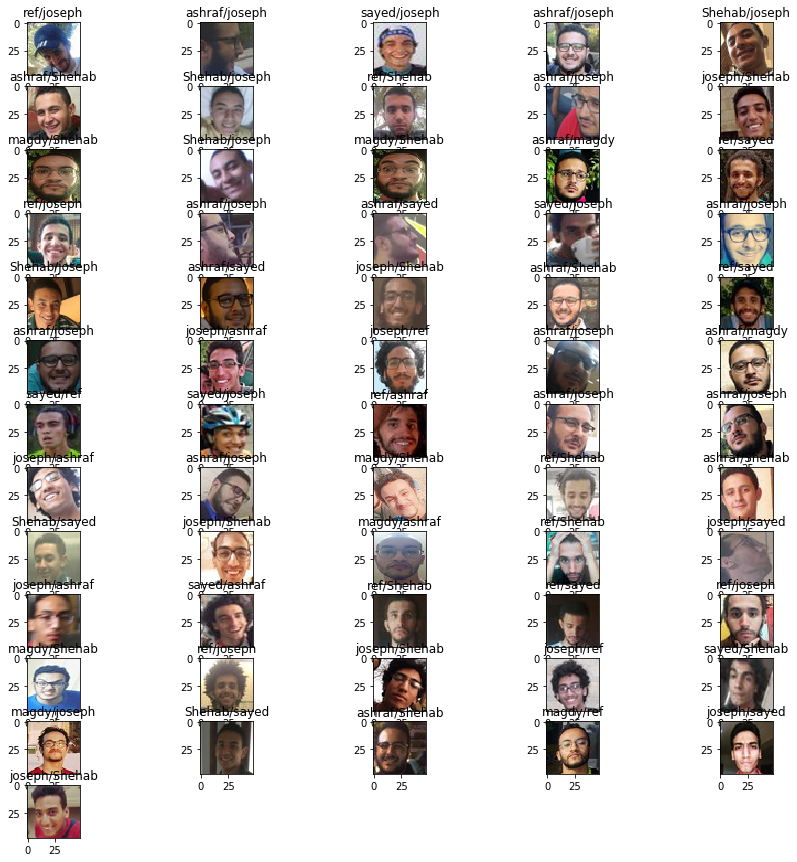

In [14]:
y_hat = model.predict(x_test)
# print(x_test.shape, y_test.shape, y_hat.shape)
cnt = 1
fig = plt.figure(figsize=(15, 15))

for i, j, k in zip(x_test, y_test, y_hat):
    if j[0] != np.where(k == np.max(k))[0][0]:
        fig.add_subplot(13, 5, cnt)
        plt.imshow((i * 255).astype(np.uint8))
        plt.title(str(classes[j[0]]+'/' + classes[np.where(k == np.max(k))[0][0]]))
        # plt.show()
        cnt += 1
print("false:", cnt)
fig.show()


In [256]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 46, 46, 20)        560       
_________________________________________________________________
batch_normalization_43 (Batc (None, 46, 46, 20)        80        
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 9, 9, 20)          0         
_________________________________________________________________
flatten_38 (Flatten)         (None, 1620)              0         
_________________________________________________________________
dense_82 (Dense)             (None, 500)               810500    
_________________________________________________________________
dense_83 (Dense)             (None, 6)                 3006      
Total params: 814,146
Trainable params: 814,106
Non-trainable params: 40
_________________________________________________________________
